# CLIP Emoji Predictor
- Article: https://medium.com/jina-ai/clip-as-service-powered-by-jina-ai-6a337917f39a
- Github: https://github.com/jina-ai/clip-as-service

In [ ]:
!pip install clip-client clip-server ipywidgets --quiet

## 1. Start CLIP  server
We are using an AWS Sagemaker notebook ml.g4dn.xlarge with conda environment pytorch_p38 
Execute form the terminal: `conda activate pytorch_p38 && python -m clip_server`

In [8]:
def is_port_in_use(port: int) -> bool:
    import socket
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        return s.connect_ex(('localhost', port)) == 0
print(f"Port is in use: {is_port_in_use(51000)}.")

Port is in use: True.


## 2. Init CLIP  client

In [9]:
from clip_client import Client

c = Client('grpc://0.0.0.0:51000')
c.profile()

Roundtrip  19ms  100% 
├──  Client-server network  11ms  57% 
└──  Server  8ms  43% 
    ├──  Gateway-CLIP network  0ms  0% 
    └──  CLIP model  8ms  100%

{'Roundtrip': 18.553686999894126,
 'Client-server network': 10.553686999894126,
 'Server': 8,
 'Gateway-CLIP network': 0,
 'CLIP model': 8}

## 3. Read emoji's

In [10]:
from docarray import DocumentArray
da = DocumentArray.from_files('./emojis/*.png')

Matplotlib is building the font cache; this may take a moment.


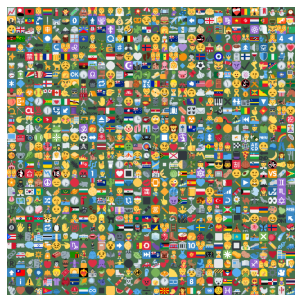

In [11]:
da.plot_image_sprites()

## 4. Encode the emoji's in the CLIP model

In [12]:
da = c.encode(da, show_progress=True)

⬆ Send ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1816/1816 • 7644 QPS • 0:00:00 • 1.6 MB
⠴ ⬇ Recv ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1808/1816 •  123 QPS • 0:00:01 • 5.4 MB

## 5. Let the model predict an  emoji  based on  your text 

In [21]:
def predict_emoji(sentence, no_predictions=4):
    vec = c.encode([sentence])
    result = da.find(query=vec, limit=no_predictions)
    result[0].plot_image_sprites()


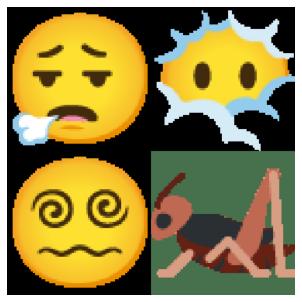

In [22]:
predict_emoji(sentence="it was hot today")

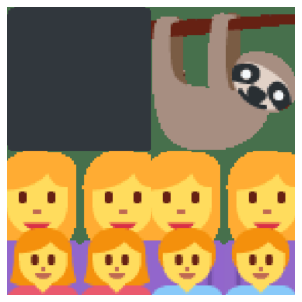

In [30]:
predict_emoji(sentence="I laughed so hard I had to cry!")

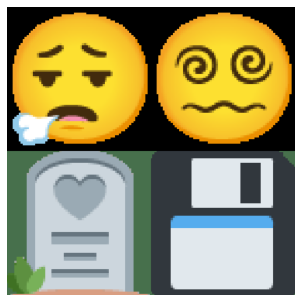

In [25]:
predict_emoji(sentence="I'm really sad now")


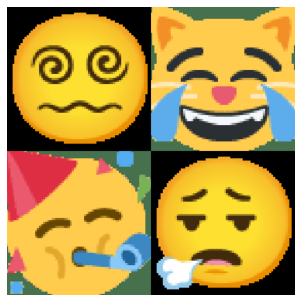

In [29]:
predict_emoji(sentence="I'm feeling happy today")


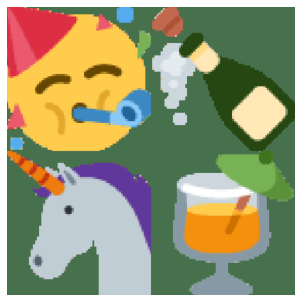

In [28]:
predict_emoji(sentence="Let's party!")


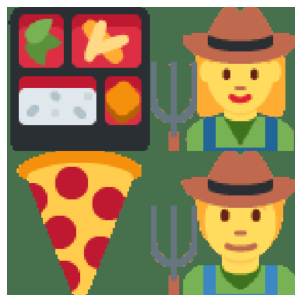

In [31]:
predict_emoji(sentence="I'm feeling hungry!")
